### Analyze emotion of the song you like & Extract color through emotion

1. Enter the song you like and extract the song's title, singer, lyrics, cover image

In [ ]:
# https://developer-next-to-you.tistory.com/28
import requests
from bs4 import BeautifulSoup

title = input("title: ")
artist = input("artist: ")

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=' + title + artist + '가사'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    lyrics = soup.select_one('div.text_expand.text_center._ellipsis')

    if lyrics == None:
        print("찾으시는 곡의 가사 정보를 찾을 수 없습니다.") # If the lyrics are not found due to the error
    else:
        song_title = soup.select_one('span > strong').text
        artist_name = soup.select_one('span.txt > a').text
        img = soup.select('a > img')[0]
        img_src = img.get('src')
        lines = lyrics.select('span')
        for line in lines:
            x = line.get_text()
            print(x, "\n")
            

else : 
    print(response.status_code)

title: tango
artist: abir
 You think I can't handle dancing on my own  It takes two to tango but only one to let go  I'm sorry I can't answer, I'm busy dancing on my own  It takes two to tango but only one to let go   I let you say your piece  And toss your keys so you can leave  I'm laying under comfy sheets  Not playing these games  I been looking to all the prophets  Praying for some different problems  I know that it's not that deep but all I can say is  ​  I'm doing fine, thought you should know  Stretching my legs without you home  I'm doing fine, thought you should know  I'm alright   You think I can't handle dancing on my own  It takes two to tango but only one to let go  I'm sorry I can't answer, I'm busy dancing on my own  It takes two to tango but only one to let go   I curse you out, you piss me off  Blew a kiss, I flipped you off  And no, I won't pick up your calls, I'm busy today  Damn, this shit just got so toxic  Don't think I don't got no options  I know that it's not 

In [ ]:
# Check whether the title and singer is accurately extracted
print(song_title)
print(artist_name)

Tango
Abir


2. Analyze emotion (Use text2emotion)

In [ ]:
!pip install text2emotion
import text2emotion as te


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Angry, Fear, Happy, Sad, Surprise, Check the percentage of five emotions in the lyrics
te.get_emotion(x)

{'Angry': 0.03, 'Fear': 0.24, 'Happy': 0.06, 'Sad': 0.32, 'Surprise': 0.35}

In [ ]:
# Extract one of the highest emotion
max(te.get_emotion(x),key=te.get_emotion(x).get) # te.get_emotion(x).get]
co = [k for k,v in te.get_emotion(x).items() if max(te.get_emotion(x).values()) == v] # 리스트 컴프리헨션 이용
co

['Surprise']

In [ ]:
# Referred to EMOTION-COLOR WHEEL, classify colors
class Colors:
    BLACK = '\033[30m'
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    CYAN = '\033[36m'
    WHITE = '\033[37m'
    UNDERLINE = '\033[4m'
    RESET = '\033[0m'

if co == ['Angry']:
  print(Colors.RED + "Your music color is RED")
elif co == ['Fear']:
  print(Colors.MAGENTA + "Your music color is MAGENTA")
elif co == ['Happy']:
  print(Colors.GREEN + "Your music color is GREEN")
elif co == ['Sad']:
  print(Colors.Blue + "Your music color is BLUE")
elif co == ['Surprise']:
  print(Colors.YELLOW + "Your music color is YELLOW")


Your music color is YELLOW


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


###Recommend Similar Musics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import re
import urllib.request

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from io import BytesIO

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords', quiet=False) 
Data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TXTData/BugsPopTop100.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Add the information of extracted music to the csv file

In [ ]:
dic_data = {'song_name': song_title, 'artist': artist_name,'Lyric': x,'cover_url': img_src}
Data.append(dic_data,ignore_index=True)


,song_name,artist,Lyric,cover_url
0,That's Hilarious,Charlie Puth(찰리 푸스),[Look how all the tables\r\nLook how all the t...,https://image.bugsm.co.kr/album/images/200/176...
1,STAY,The Kid LAROI,[\n\nI do the same thing\nI told you that I ne...,https://image.bugsm.co.kr/album/images/200/158...
2,I Just Called,Neiked,[Now I'm getting really brave I had a few shot...,https://image.bugsm.co.kr/album/images/200/180...
3,Light Switch,Charlie Puth(찰리 푸스),[Yeah\r\nWhy you callin' at 11:30\r\nWhen you ...,https://image.bugsm.co.kr/album/images/200/407...
4,Off My Face,Justin Bieber(저스틴 비버),[One touch and you got me stoned\r\nHigher tha...,https://image.bugsm.co.kr/album/images/200/151...
...,...,...,...,...
99,I Blame The World,Sasha Alex Sloan,[Why fall in love if I fall out?\r\nWhy get hi...,https://image.bugsm.co.kr/album/images/200/179...
100,Tango,Abir,You think I can't handle dancing on my own I...,https://search.pstatic.net/common?type=n&size=...
101,Tango,Abir,You think I can't handle dancing on my own I...,https://search.pstatic.net/common?type=n&size=...
102,Tango,Abir,You think I can't handle dancing on my own I...,https://search.pstatic.net/common?type=n&size=...


In [ ]:
dic_data

{'Lyric': " You think I can't handle dancing on my own  It takes two to tango but only one to let go  I'm sorry I can't answer, I'm busy dancing on my own  It takes two to tango but only one to let go   I let you say your piece  And toss your keys so you can leave  I'm laying under comfy sheets  Not playing these games  I been looking to all the prophets  Praying for some different problems  I know that it's not that deep but all I can say is  \u200b  I'm doing fine, thought you should know  Stretching my legs without you home  I'm doing fine, thought you should know  I'm alright   You think I can't handle dancing on my own  It takes two to tango but only one to let go  I'm sorry I can't answer, I'm busy dancing on my own  It takes two to tango but only one to let go   I curse you out, you piss me off  Blew a kiss, I flipped you off  And no, I won't pick up your calls, I'm busy today  Damn, this shit just got so toxic  Don't think I don't got no options  I know that it's not that deep 

In [ ]:
Data.shape  

(103, 4)

In [ ]:
# Check the overlapped ones
Data.duplicated().sum()

2

In [ ]:
# Remove duplicates
data = Data.drop_duplicates()
data.tail()


,song_name,artist,Lyric,cover_url
96,blur,Johnny Orlando,[In a blur\r\nIn a in a in a blur\r\nIn a in a...,https://image.bugsm.co.kr/album/images/200/180...
97,To Die For,Sam Smith(샘 스미스),[It is if everyone dies alone\r\nDoes that sca...,https://image.bugsm.co.kr/album/images/200/138...
98,Levitating,Dua Lipa(두아 리파),[If you wanna run away with me\r\nI know a gal...,https://image.bugsm.co.kr/album/images/200/948...
99,I Blame The World,Sasha Alex Sloan,[Why fall in love if I fall out?\r\nWhy get hi...,https://image.bugsm.co.kr/album/images/200/179...
100,Tango,Abir,You think I can't handle dancing on my own I...,https://search.pstatic.net/common?type=n&size=...


In [ ]:
data.tail(10)

,song_name,artist,Lyric,cover_url
91,10 Things I Hate About You,Leah Kate,[I caught you cheatin'\r\nYou had the nerve to...,https://image.bugsm.co.kr/album/images/200/176...
92,Dance When You Cry,Fiji Blue,[It’s alright\nThat you’ve been dancing alone ...,https://image.bugsm.co.kr/album/images/200/179...
93,SPACE MAN,Sam Ryder,[If I was astronaut\r\nI'd be floating in mid ...,https://image.bugsm.co.kr/album/images/200/171...
94,Everything Black,Unlike Pluto,[Shadows fall over my heart\r\nI black out the...,https://image.bugsm.co.kr/album/images/200/132...
95,dna,LANY(레이니),[My reputation says that I fall too fast\r\nTh...,https://image.bugsm.co.kr/album/images/200/161...
96,blur,Johnny Orlando,[In a blur\r\nIn a in a in a blur\r\nIn a in a...,https://image.bugsm.co.kr/album/images/200/180...
97,To Die For,Sam Smith(샘 스미스),[It is if everyone dies alone\r\nDoes that sca...,https://image.bugsm.co.kr/album/images/200/138...
98,Levitating,Dua Lipa(두아 리파),[If you wanna run away with me\r\nI know a gal...,https://image.bugsm.co.kr/album/images/200/948...
99,I Blame The World,Sasha Alex Sloan,[Why fall in love if I fall out?\r\nWhy get hi...,https://image.bugsm.co.kr/album/images/200/179...
100,Tango,Abir,You think I can't handle dancing on my own I...,https://search.pstatic.net/common?type=n&size=...


In [ ]:
# Check whether the lyrics are accurate
data['Lyric'][0]

"[Look how all the tables\r\nLook how all the tables have turned\r\nGuess you're finally realizing\r\nhow bad you messed it up\r\nGirl you're only makin'\r\nGirl you're only makin' it worse\r\nWhen you call like you always do\r\nwhen you want someone\r\nYou took away a year\r\nOf my fuckin' life\r\nAnd I can't get it back no more\r\nSo when I see those tears\r\nComin' out your eyes\r\nI hope it's me they're for\r\nYou didn't love when you had me\r\nBut now you need me so badly\r\nYou can't be serious (Ha ha ha)\r\nThat's hilarious (Ha ha ha ha ha)\r\nThinkin' I would still want you\r\nAfter the things you put me through\r\nYeah you're delirious (Ha ha ha)\r\nThat's hilarious (Ha ha ha ha ha)\r\nNow you put the blame in\r\n(Now you put the blame in)\r\nNow you put the blame in reverse\r\nTryna make me feel guilty for everything\r\nyou've done\r\nYou're another lesson (You're another lesson)\r\nYou're just another lesson I learned\r\nDon't give your heart to a girl\r\nwho's still got a b

In [ ]:
def deleteNonAscii(text):
    return "".join(word for word in text if  ord(word) < 128)   

def make_lower_case(text):
    return text.lower() 

def delete_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))      # set 함수 : 집합 함수 - 중복 원소 삭제 기능 
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def delete_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def delete_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')       # 정규식을 이용하여 tokenizing 
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text


data['cleaned'] = data['Lyric'].apply(deleteNonAscii)

data['cleaned'] = data.cleaned.apply(make_lower_case)

data['cleaned'] = data.cleaned.apply(delete_stop_words)

data['cleaned'] = data.cleaned.apply(delete_punctuation)

data['cleaned'] = data.cleaned.apply(delete_html)

# Keep Refining


In [ ]:
data['cleaned'][:10]

0    look tables look tables turned guess finally r...
1    thing told never would told i d change even kn...
2    now i m getting really brave shots would say f...
3    yeah callin wanna dirty hit right back cause g...
4    one touch got stoned higher i ve ever known ca...
5    i m love i m love ever wanna stop ride we re e...
6    holding back gravity s holding back want hold ...
7    you know bed feels warmer sleeping alone know ...
8                                                     
9    every second every day spend hoping never chan...
Name: cleaned, dtype: object

In [ ]:

data['cleaned'].replace("", np.nan, inplace=True)

data = data[data['cleaned'].notna()]      # notna method는 DataFrame에서 특정 컬럼에 대해 누락값(NaN, null 등)이 있는 행을 필터링할 때 유용

print('◎ 전체 문서의 수 :',len(data))


◎ 전체 문서의 수 : 98


In [ ]:
corpus = []

for words in data['cleaned']:
    corpus.append(words.split())
    

print('◎ corpus 크기 = ', len(corpus))  # 행 사이즈

◎ corpus 크기 =  98


In [ ]:
print('◎ corpus 데이터 내용 = \n', corpus[10])

◎ corpus 데이터 내용 = 
 ['you', 'universe', 'want', 'put', 'first', 'universe', 'night', 'lie', 'look', 'morning', 'comes', 'watch', 'rise', 'there', 's', 'paradise', 'capture', 'bright', 'infinity', 'inside', 'eyes', 'never', 'ending', 'forever', 'baby', 'universe', 'want', 'put', 'first', 'universe', 'make', 'world', 'light', 'inside', 'eyes', 'said', 'can', 't', 'together', 'come', 'different', 'sides', 'universe', 'want', 'put', 'first', 'universe', 'make', 'world', 'light', 'inside', 'universe', 'do', 'do', 'universe', 'do', 'do', 'universe', 'do', 'do', 'you', 'make', 'world', 'make', 'world', 'light', 'inside', 'make', 'world', 'light', 'inside', 'i', 'm', 'without', 'i', 'm', 'crazy', 'made', 'baby', 'universe', 'want', 'put', 'first', 'universe', 'make', 'world', 'light', 'inside', 'universe', 'you', 'are', 'universe', 'i', 'want', 'universe', 'you', 'are', 'universe', 'universe']


In [ ]:
import time
import datetime


# 사전 훈련된 구글의 Word2Vec을 로드하고 초기 단어 벡터값으로 사용
#
# 300 차원의 Word2Vec 벡터
# 파일 크기 : 3 million words * 300 features * 4byte/feature = ~3.5GB


w2v_model = Word2Vec(size = 300, window= 5, min_count= 2, workers = 4)

w2v_model.build_vocab(corpus)   # Build vocabulary from a sequence of sentences


start = time.time()    # 시작 시간 기록 

# lockf (lock-factor value) : 1.0 으로 세팅시 벡터값의 update를 허용, 0.0 세팅시 벡터값의 update를 허용 안함
#
# 약 2분 정도 소요 

File_Path = "/content/gdrive/My Drive/Colab Notebooks/TXTData/텍스트마이닝 공유폴더/GoogleNews-vectors-negative300.bin.gz"

w2v_model.intersect_word2vec_format(File_Path, lockf=1.0, binary=True)  # 교차시키면 3백만 단어가 아니라 공통분모만 살아남음.


# total_examples : 문장 수 

w2v_model.train(corpus, total_examples = w2v_model.corpus_count, epochs = 15)


processing_time = time.time() - start    # 경과 시간 계산  
times = str(datetime.timedelta(seconds = processing_time))    

print(times)


0:01:47.780240


In [ ]:
print(len(w2v_model.wv.vocab))

1338


In [ ]:
def get_document_vectors(document_list):
    
    document_embedding_list = []

    # 각 문서에 대해서 연산 
    for line in document_list:
        
        doc2vec = None
        count = 0
        
        for word in line.split():

            if word in w2v_model.wv.vocab:
                
                count += 1
                
                # 해당 문서에 있는 모든 단어들의 벡터값을 더해줌 
                
                if doc2vec is None:
                    doc2vec = w2v_model[word]
                else:
                    doc2vec = doc2vec + w2v_model[word]

        if doc2vec is not None:
            
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이(단어 수)로 나누어줌 
            doc2vec = doc2vec / count
            
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 반환 
    return document_embedding_list

In [ ]:
document_embedding_list = get_document_vectors(data['cleaned'])

print()
print('◎ 문서 벡터의 수 :',len(document_embedding_list))


◎ 문서 벡터의 수 : 98


In [ ]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)


print('◎ 코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)   # shape은 (문서 수 by 문서 수)

◎ 코사인 유사도 매트릭스의 크기 : (98, 98)


In [ ]:
def recommendations(song_name):
    
    songs = data[['song_name', 'cover_url']]    # pandas 생성
    

    # 노래의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장
    
    indices = pd.Series(data.index, index = data['song_name']).drop_duplicates()    # title을 인덱스로 하고, 내용을 index 로 하는 Series 구조를 build-up 
    idx = indices[song_name]    # 노래의 인덱스를 idx 로 저장  # 타이틀의 노래 번호
    print('◎ song index  = ', idx-3)

    # 입력된 노래와 가사(document embedding)가 유사한 노래 선정
    #
    # 주어진 노래과 나머지 노래와의 유사도 계산 
    
    sim_scores = list(enumerate(cosine_similarities[idx-3]))     # enumerate() 함수 : 인덱스와 원소로 이루어진 tuple을 생성 
    
    print('◎ sim_scores = ', sim_scores)      #  (index, 코사인 유사도 value) 형식으로 출력 
    
    # 유사도 값 순으로 정렬해 줌 - 유사도가 가장 큰 0번 노래는 주어진 노래 자신임  # 큰 값부터
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)   # x[1]은 코사인 유사도 value를 의미

    print('◎ sorted 된 sim_scores = ', sim_scores)
    
    
    # 유사도 값이 큰 순서로 6개를 추출 (자신의 노래 포함 + 5)
    sim_scores = sim_scores[:6]

    print('◎ sim_scores[:6] = ', sim_scores)


    # 가장 유사한 노래의 인덱스를 저장 
    song_indices = [i[0] for i in sim_scores]  # i[0] -> index
    
    print('◎ song_indices = ', song_indices)
    print()
    

    # 전체 데이터프레임에서 해당 인덱스의 행만 추출 - 6개의 행을 가짐 
    
    recommend = songs.iloc[song_indices].reset_index(drop=True)

    fig = plt.figure(figsize=(20, 30))

    # 데이터프레임으로부터 순차적으로 이미지를 출력
    
    for index, row in recommend.iterrows():       # iterrows 객체는 DataFrame의 각 행의 정보를 담은 객체 (index, 행 데이터)
        response = requests.get(row['cover_url'])
        img = Image.open(BytesIO(response.content))  # BytesIO = Python image library
        fig.add_subplot(1, 6, index + 1)
        plt.imshow(img)
        plt.title(row['song_name'])
        
        
        

Recommend 6 songs(including self) according to the lyrics

◎ song index  =  97
◎ sim_scores =  [(0, 0.64890325), (1, 0.8170719), (2, 0.92227596), (3, 0.72928226), (4, 0.8529296), (5, 0.8358526), (6, 0.85050553), (7, 0.7973174), (8, 0.8497733), (9, 0.73972666), (10, 0.6442376), (11, 0.7739329), (12, 0.8932021), (13, 0.84245926), (14, 0.8232295), (15, 0.6869827), (16, 0.55746037), (17, 0.6265186), (18, 0.8819166), (19, 0.8960024), (20, 0.74570006), (21, 0.65601176), (22, 0.8051995), (23, 0.7432179), (24, 0.7593417), (25, 0.6304604), (26, 0.85050553), (27, 0.851188), (28, 0.92437494), (29, 0.8749777), (30, 0.8212283), (31, 0.7733397), (32, 0.8453186), (33, 0.66323036), (34, 0.7963768), (35, 0.84348226), (36, 0.7721958), (37, 0.7022007), (38, 0.69632554), (39, 0.54744583), (40, 0.70403147), (41, 0.8629408), (42, 0.76398283), (43, 0.8829062), (44, 0.53913933), (45, 0.9032292), (46, 0.85716265), (47, 0.7845545), (48, 0.9115201), (49, 0.72760046), (50, 0.836925), (51, 0.567346), (52, 0.8818702), (53, 0.7906614), (54, 0.84749377), (55, 0.885054), (56,

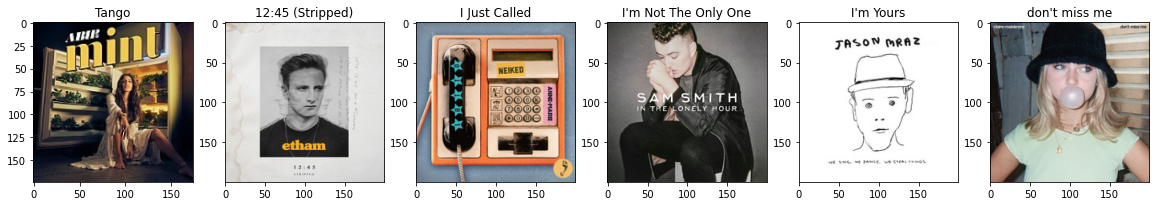

In [ ]:
recommendations("Tango")